In [1]:
import numpy as np # matrix operations
import pandas as pd # for loading CSV files
import matplotlib.pyplot as plt # for Data Visualization

In [2]:
data = pd.read_csv("heart_disease.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
# removing the column that contains the data we are trying to predict ('target' column)
X = data.drop('target', axis = 1) 
# axis=1 indicates that the column will be dropped and then this column is save in the y variable
y = data['target']

In [6]:
# split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# random_state = 42 means that the split will be the same every time code is run

In [7]:
X_train.shape[1] # number of features in the dataset

13

Model Building

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape=(X_train.shape[1],))) # number of features is the same as the number of features in the dataset   
model.add(Dense(32, activation = 'relu')) # 32 nodes
model.add(Dense(16, activation = 'relu')) # 16 nodes
model.add(Dense(8, activation = 'relu')) # 8 nodes
model.add(Dense(1, activation = 'sigmoid')) 
# sigmoid function is used in the output layer bc it gives a probability between 0 and 1 which is useful in classification


Model Compilation

In [19]:
from tensorflow.keras.optimizers import RMSprop # RMSprop, which stands for Root Mean Square Propagation, is a gradient descent optimization algorithm.
optimizer = RMSprop(0.01) # learning rate = 0.001
model.compile(loss='binary_crossentropy', optimizer = optimizer, metrics=['accuracy']) # the loss function is binary_crossentropy - the usual choice for binary classification problems that give output in the form of probability

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


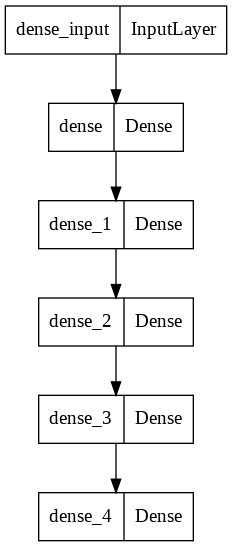

In [20]:
from tensorflow.keras.utils import plot_model
plot_model(model)

Model Training

In [21]:
# model is trained initially for 200 epochs with a batch size of 10
# the training set is split again into validation data and training data to evaluate itself at the end of each epoch
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=10, verbose=1)

Epoch 1/200
20/20 [==============================] - 2s 27ms/step - loss: 3.0009 - accuracy: 0.6062 - val_loss: 0.9291 - val_accuracy: 0.5714
Epoch 2/200
20/20 [==============================] - 0s 5ms/step - loss: 0.8295 - accuracy: 0.5544 - val_loss: 0.7079 - val_accuracy: 0.5918
Epoch 3/200
20/20 [==============================] - 0s 5ms/step - loss: 0.7552 - accuracy: 0.5492 - val_loss: 0.6774 - val_accuracy: 0.5714
Epoch 4/200
20/20 [==============================] - 0s 5ms/step - loss: 0.6903 - accuracy: 0.5751 - val_loss: 0.6793 - val_accuracy: 0.6122
Epoch 5/200
20/20 [==============================] - 0s 6ms/step - loss: 0.7841 - accuracy: 0.5233 - val_loss: 0.6752 - val_accuracy: 0.5714
Epoch 6/200
20/20 [==============================] - 0s 5ms/step - loss: 0.6863 - accuracy: 0.5389 - val_loss: 0.6647 - val_accuracy: 0.5714
Epoch 7/200
20/20 [==============================] - 0s 4ms/step - loss: 0.7457 - accuracy: 0.5440 - val_loss: 0.6737 - val_accuracy: 0.6939
Epoch 8/200


In [22]:
# evaluate the model on the initial X_test we created with the split
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6488 - accuracy: 0.8361


[0.6488199830055237, 0.8360655903816223]

Model Accuracy

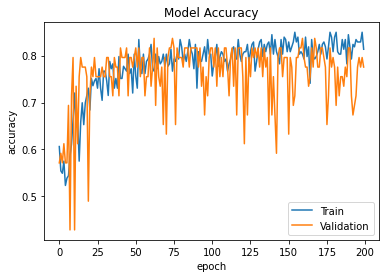

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss

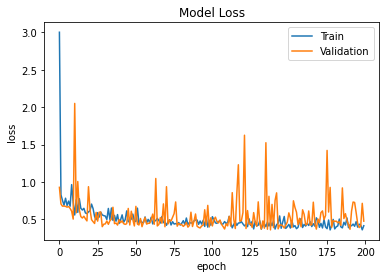

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()